# Data Mining - Handin 2 - Graph mining

This handin corresponds to the topics in Week 11-15 in the course.

The handin is 
* done in groups
* worth 10% of the grade

For the handin, you will prepare a report in PDF format, by exporting the Jupyter notebook. 
Please submit
1. The jupyter notebook file with your answers
2. The PDF obtained by exporting the jupyter notebook

**The grading system**: Tasks are assigned a number of points based on the difficulty and time to solve it. The sum of
the number of points is **100**. For the maximum grade you need to get at least _80 points_. The minimum grade (02 in the Danish scale)
requires **at least** 30 points, with at least 9 points from the first three Parts (Part 1,2,3) and 3 points in the last part (Part 4).
Good luck!

**The exercise types**: There are four different types of exercises
1. <span style='color: green'>**\[Compute by hand\]**</span> means that you should provide NO code, but show the main steps to reach the result (not all). 
2. <span style='color: green'>**\[Motivate\]**</span> means to provide a short answer of 1-5 lines indicating the main reasoning, e.g., the PageRank of a complete graph is 1/n in all nodes as all nodes are symmetric and are connected one another.
3. <span style='color: green'>**\[Prove\]**</span> means to provide a formal argument and NO code. 
4. <span style='color: green'>**\[Implement\]**</span> means to provide an implementation. Unless otherwise specified, you are allowed to use helper functions (e.g., ```np.mean```, ```itertools.combinations```, and so on). **However**, if the task is to implement an algorithm, by no means a call to a library that implements the same algorithm will be deemed as sufficient!

**Q&A**

Q: If the task is to implement a mean function, may I just call ```np.mean()```? 
<br>A: No.

Q: If the task is to compare the mean of X and Y, may I use ```np.mean()``` to calculate the mean?
<br>A: Yes.

Q: If I have implemented a mean function in a previous task, but I am unsure of its correctness, may I use ```np.mean()``` in following task where mean is used as a helper function? 
<br>A: Yes.

Q: May I use ```np.mean()``` to debug my implementation of mean?
<br>A: Yes.

Q: Do I get 0 points for a task if I skip it?
<br>A: Yes.

Q: Can I get partial points for a task I did partially correct?
<br>A: Yes.

Q: Is it OK to skip a task if I do not need the points from it?
<br>A: Yes.

Q: Should I inform a TA if I find an error?
<br>A: Yes.

Q: Should I ask questions if I am confused?
<br>A: Yes.



Good luck!

In [1]:
### BEGIN IMPORTS - DO NOT TOUCH!
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
import sys
sys.path.append('..')
#!{sys.executable} -m pip install matplotlib
#!{sys.executable} -m pip install networkx
#!{sys.executable} -m pip install torchvision
import random
import scipy.io as sio
import time

import networkx as nx
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

import csv
from itertools import count


import torch
import torch.optim
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import pickle


from utilities.load_data import load_mnist
import utilities.email as email
#from utilities.mnist import *

from utilities.make_graphs import read_edge_list, read_list, load_data

### END IMPORTS - DO NOT TOUCH!

c:\Users\sofie\anaconda3\envs\dm24\lib\site-packages\torchvision\io\image.py:13: UserWarning: Failed to load image Python extension: '[WinError 127] The specified procedure could not be found'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


c:\Users\sofie\OneDrive\Skrivebord\Uni\F24\Data Mining\dm2024-exercises-main\handins


## Task 1.1 Random walks and PageRank  (10 points)

In this exercise recall that the PageRank is defined as 
$$\mathbf{r} = \alpha \mathbf{Mr} + (1-\alpha)\mathbf{p}$$ 
where $\mathbf{r}\in \mathbb{R}^n$ is the PageRank vector, $\alpha$ is the restart probability, $\mathbf{M} = A\Delta^{-1}$, and $\mathbf{p}$ is the restart (or personalization) vector. 

**************************************
### Task 1.1.1 (4 points)
What is the PageRank of a **$d$-regular** graph with $n$ nodes and $\alpha=1$? 

<span style='color: green'>**\[Motivate\]**</span> your answer without showing the exact computation. 

With an $\alpha$ value of 1, the page Rank is simply given by $\mathbf{r} = \mathbf{Mr}$. 
As per the definition of PageRank, the PageRank of a page is the sum of the PageRank of the pages that links to it. Since it is a d-regular graph, all nodes would have an equal amount of connections/links, and therefore would end up with the same PageRank score. The PageRank becomes evenly distributed for all nodes with a score of $\frac{1}{n}$




*************************************
### Task 1.1.2 (4 points)
Look at the graph below (run the code) and try make a guess about the PageRank values of each node by only looking the graph.

$\mathbf{r} = \begin{pmatrix} \frac{1}{6} \\ \frac{2}{6} \\ \frac{2}{6}  \\  \frac{1}{6} \end{pmatrix}$

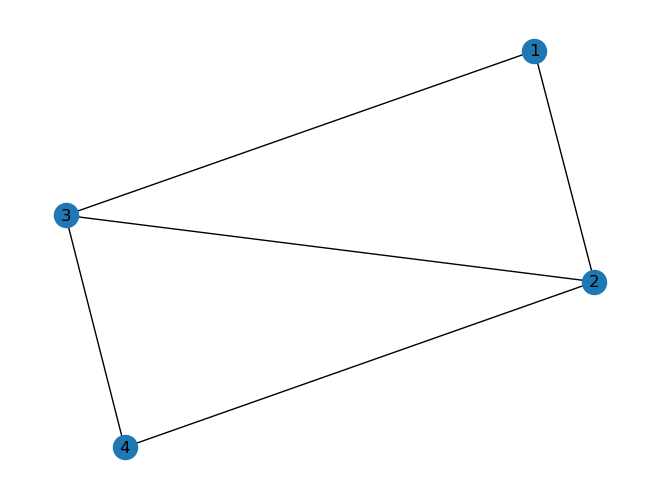

In [2]:
G = nx.Graph()
G.add_edges_from([(1,2),(2,3), (2,4), (3,4), (1,3)])
nx.draw(G, with_labels=True, )

<span style='color: green'>**A) \[Implement\]**</span> the PageRank for $\alpha=1$ for the graph using the Power Iteration method (use $\epsilon=1e-16$ to stop the iteration).<br> 

<span style='color: green'>**B) \[Implement]**</span> Plot the norm square difference of the $r$ vector between two iterations. 

<span style='color: green'>**C) \[Motivate\]**</span> Do you observe a constanct decrease of the norm square difference as iterations are increasing, and is it expected or not?

<span style='color: green'>**D) \[Implement\]**</span> the PageRank for $\alpha=1$ using the eigenvector method.<br> 

<span style='color: green'>**E) \[Motivate\]**</span> Are solutions of both methods the same? Why don't we only use the eigenvector method that optimally solves the problem? 

<span style='color: green'>**F) \[Motivate\]**</span> Do the real eigenvalues match with your first guess? Can you see a pattern between the eigenvalues of each node and its edges?   

In [3]:
#A)

M = np.array([[0, 1/3, 1/3, 0],
              [1/2, 0, 1/3, 1/2],
              [1/2, 1/3, 0, 1/2],
              [0, 1/3, 1/3, 0]])


def PageRankPowerIteration(M, tol=1e-16):
    n, _ = M.shape
    r0 = np.full(n, 1/n)

    dist = []

    while True:
        r = np.einsum('ij,j', M, r0)
        dist += [np.linalg.norm(r0-r)]    

        if np.allclose(r0, r, atol=tol, rtol=tol):
            return r, dist
        r0 = r


pageRank, L = PageRankPowerIteration(M)
pageRank

array([0.2, 0.3, 0.3, 0.2])

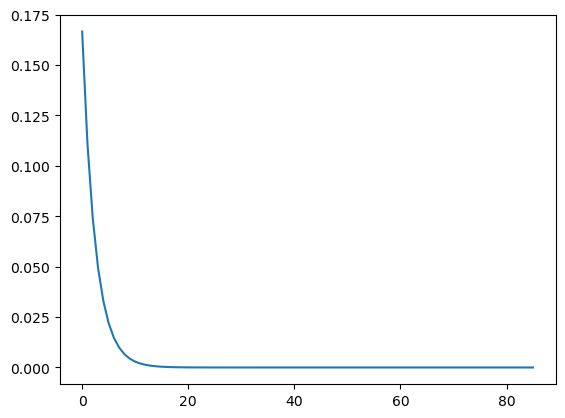

In [4]:
#B) 
plt.plot(range(len(L)), L)

<span style="color:red"> C) 

As seen on the graph above, the decrease is not constant, as expected. Within the first iterations we see 


In [5]:
#D) YOUR CODE HERE
def PageRankEigen(M):
    val, vec = np.linalg.eig(M)
    rank = vec[:,0].T # select dominant eigenvector 
    return rank/np.sum(rank) # normalize


PageRankEigen(M)

array([0.2, 0.3, 0.3, 0.2])

<span style="color:red"> E) 

The achieved PageRank from both methods is the same. However, for very large graphs it can be very computationally expensive to find the eigenvectors for the large matrices. And as seen on the previous graph, power iteration starts toconverges after relativlely few iterations, and is more scaleble. Moreover, power iteration can be updated incrementally, whereas the eigenvector approach requires re-computing the eigenvectors once again. 

<span style="color:red"> F)

The PageRank does not match the initial guess. However, it can be seen that the PageRank is proportional to how many edges each node is connected to  out of the total amount of 'connections' (ie, how many connections between node and edge - meaning two for each edge and ten in total for the given graph). For example node 3 has three connections out of ten in total, and hence has a PageRank of 0.3.

******************
### Task 1.1.3 (2 points)

<span style='color: green'>**\[Motivate\]**</span> Assume you have embedded the graph in **1.1.2** with a __Linear Embedding__ using unormalized Laplacian matrix of the graph as the similarity matrix. How do you expect the embeddings to be if the embedding dimension is $d = 1$? 

* [ ] Nodes 1, 2, 3, 4 will be placed in the corners of a hypercube
* [X] Nodes 2,3 will have the same embedding while 1,4 will be far from each other.
* [ ] Nodes 1,4 havee the same embedding and 2,3 will have very close embeddings.
* [ ] Nodes 3,4 will be very far apart.

The entries of the (un)normalized laplacian represents the strength of connection betweeen two nodes; since 2 and 3 are connected and have the same 'community' (ie., connected to the same nodes), these would be expected to have the same embedding, whereas 1 and 4 aren't connected, and would be far apart.
******************

## Task 1.2: Spectral Properties of the Graph Laplacian (10 points)
 <span style='color: green'>**\[Prove\]**</span> **the following properties:**
 You will be given points for each of the properties that you prove, rather than points for the exercise as a whole.

**Note that all question correspond to the eigenvalues of the LAPLACIAN (NOT THE NORMALIZED)**

For a graph with $n$ nodes the eigenvalues of the LAPLACIAN ($L  = D - A$) is noted as:<br>
**$\lambda_0\leq\lambda_1\leq...\leq\lambda_{n-1}$**

*******************
### Task 1.2.1 (2 points)

For all graphs $\lambda_0 = 0$ 

*******************
<span style="color:red">**YOUR ANSWER HERE**</span>
******************

### Task 1.2.2 (2 points)
For the complete graph, $\lambda_1, \dots, \lambda_{n-1} = n$

*******************
<span style="color:red">**YOUR ANSWER HERE**</span>
******************

### Task 1.2.3 (2 points)

For all the graphs with $k$ connected components $\lambda_0 = \lambda_1 =...=\lambda_{k-1} = 0$

******************
<span style="color:red">**YOUR ANSWER HERE**</span>
******************

### Task 1.2.4 (2 points)
Given a graph $G$ with eigenvalues of the laplacian $\lambda_0, \lambda_1,...,\lambda_{n-1}$.<br>
We remove a single edge from $G$ and we re-calculate the eigenvalues as $\lambda'_0, \lambda'_1,...,\lambda'_{n-1}$.<br>

Can we have $\lambda'_{i}>\lambda_{i}$ for some $0\leq i\leq n-1$? Why? Why not?

******************
<span style="color:red">**YOUR ANSWER HERE**</span>
*****************

### Task 1.2.5 (2 points)
Suppose that the graph $G$ is consisted of two connected componentes of equal size named as $G_1$ and $G_2$.<br>
The Laplacian of $G_1$ has eigenvalues $\lambda^1_0,\lambda^1_1,...,\lambda^1_{n/2-1}$.<br>
The Laplacian of $G_2$ has eigenvalues $\lambda^2_0,\lambda^2_1,...,\lambda^2_{n/2-1}$.<br>
Prove that the  Laplacian of $G$ is consisted of the eigenvalues of the Laplacians of $G_1$ and $G_2$ in ascending order.

******************
<span style="color:red">**YOUR ANSWER HERE**</span>
******************

# Part 2: Graphs and Spectral clustering
In this part, you will experiment and reflect on spectral clustering as a technique for partitioning a graph. 

## Task 2.1 $\varepsilon$-neighbourhood graph (10 points)

In this subsection you will experiment with biological data https://journals.plos.org/ploscompbiol/article?id=10.1371/journal.pcbi.1003268.

First run the following code to load the data.

In [6]:
#Load Data
from utilities.make_graphs import read_edge_list, read_list, load_data
import numpy as np
X, Y = load_data()

******************
### Task 2.1.1 (4 points)
<span style='color: green'>**\[Implement\]**</span> the $\varepsilon$-neighborhood graph, using Eucledian (L2) distance. 

**Note**: Be sure that your constructed graphs does not contain loop edges (edges from i to i for some node i)

In [7]:
#YOUR CODE HERE
# Be sure that your constructed graphs does not 
# contain loop edges (edges from i to i for some node i)
from sklearn.neighbors import NearestNeighbors 

def nn_graph(data, eps, remove_self=True, directed=False):
    n = len(X)
    G = nx.Graph()    
    if directed:
        G = nx.DiGraph()
    ### YOUR CODE HERE
    ### YOUR CODE HERE
    return G

### Task 2.1.2 (2 points)


Try with different epsilons (select a small set of epsilons, e.g., 0.01-0.5 values) and plot the graphs. 

<span style='color: green'>**\[Motivate\]**</span> what you observe as epsilon increases. 

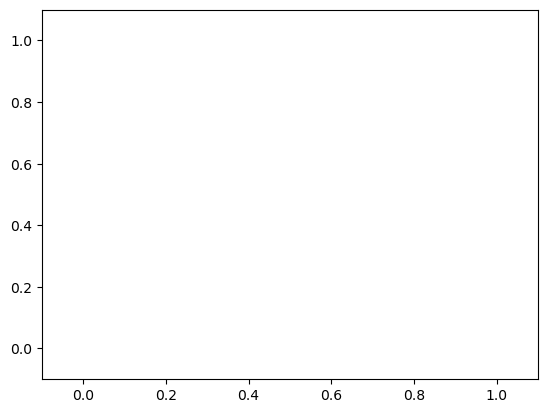

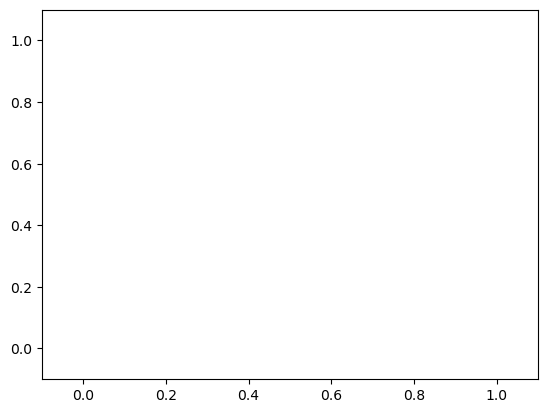

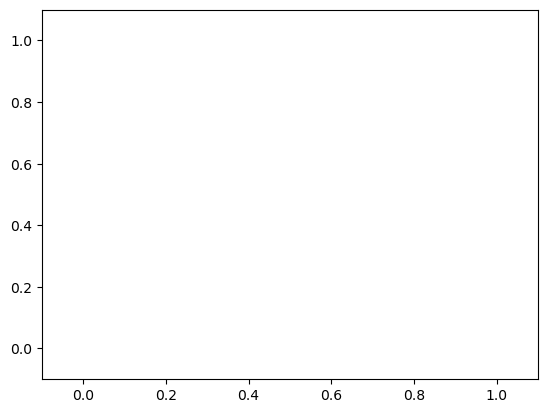

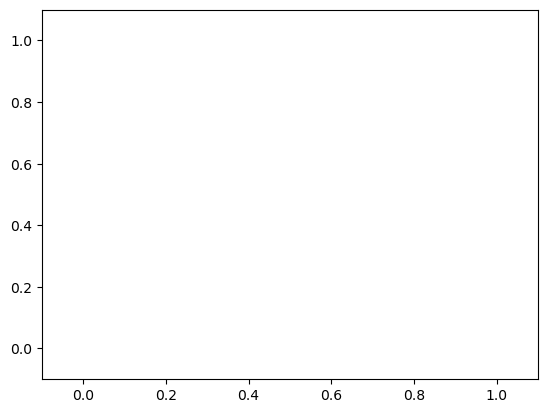

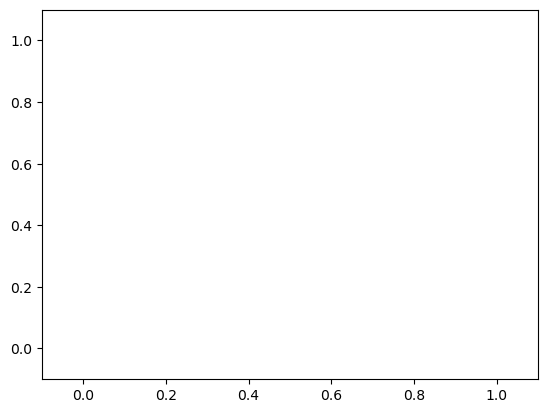

In [8]:
### Run the code below
eps_values = [0.01, 0.05, 0.1, 0.2, 0.4]

for eps in eps_values: 
    ax=plt.subplot()
    ax1=plt.subplot()
    G = nn_graph(X, eps)
    #G1=nx.numpyto
    pos=nx.spring_layout(G)  
    nx.draw_networkx_edges(G,pos=X)
    nx.draw_networkx_nodes(G, pos=X, node_color=Y, node_size=20, cmap=plt.get_cmap('tab10'))
    ax.set_xlim(-0.1, 1.1)
    ax.set_ylim(-0.1, 1.1)
    plt.show()

<span style="color:red">**YOUR ANSWER HERE**</span>

******************
### Task 2.1.3 (2 points)
Assign to each edge in the $\varepsilon$-neighborhood graph a weight

$$W_{i j}=e^{-\frac{\left\|\mathbf{x}_{i}-\mathbf{x}_{j}\right\|^{2}}{t}}$$

<span style='color: green'>**\[Implement\]**</span> the function ```weighted_nn_graph``` below that returns the weighted graph given the data matrix in input and the values eps and t, where t is the parameter of the equation above. 

In [9]:
def weighted_nn_graph(data, eps=20, t=0.1):
    n = len(data)
    G = nx.Graph()
    ### YOUR CODE HERE
    ### YOUR CODE HERE
    return G

### Task 2.1.4 (2 points)

We now vary $t \in \{10, 0.1, 0.000001\}$. Plot the weights as a histogram in order to analyse the results using the provided code.</br>
What happens when $t$ is very small, close to $0$, i.e., $t \rightarrow 0$?</br> What happens when $t$ is very large?
</br>Is the behaviour with $t = 0$ expected?

<span style='color: green'>**\[Motivate\]**</span> your answer reasoning on the formula. 

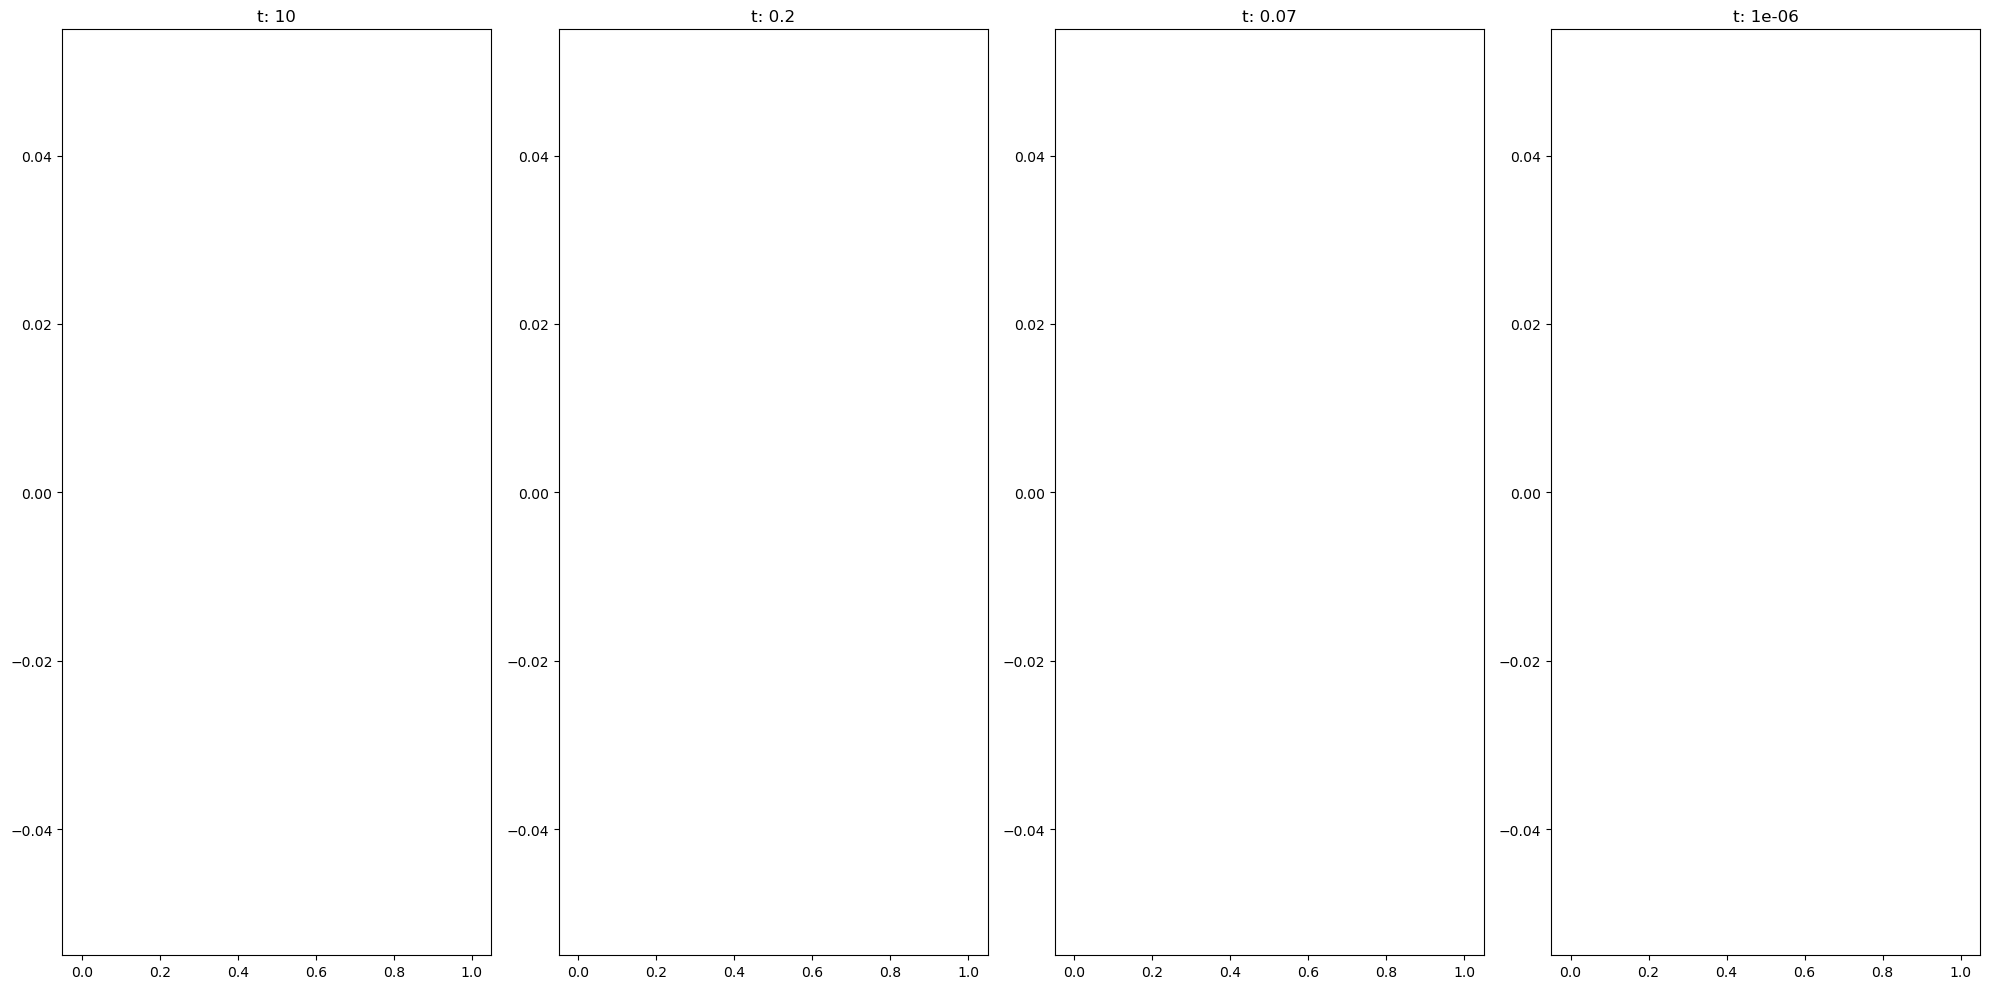

In [10]:
ts = [10, 0.2, 0.07, 0.000001]
fig, ax = plt.subplots(1,4, figsize=(20, 10))
row = 0

for i, t in enumerate(ts):
    G = weighted_nn_graph(X, eps=60, t=t)
    ys = []
    

    col = i 
    for i, d in enumerate(G.edges.data()):
        ys.append(d[2]['weight'])
    plt.hist(ys, bins=100)
    ax[col].hist(ys, bins=100)
    ax[col].set_title("t: "+str(t))
    
plt.tight_layout()

******************
<span style="color:red">**YOUR ANSWER HERE**</span>
******************

## Task 2.2: Spectral clustering (20 points)

[0 1 2]


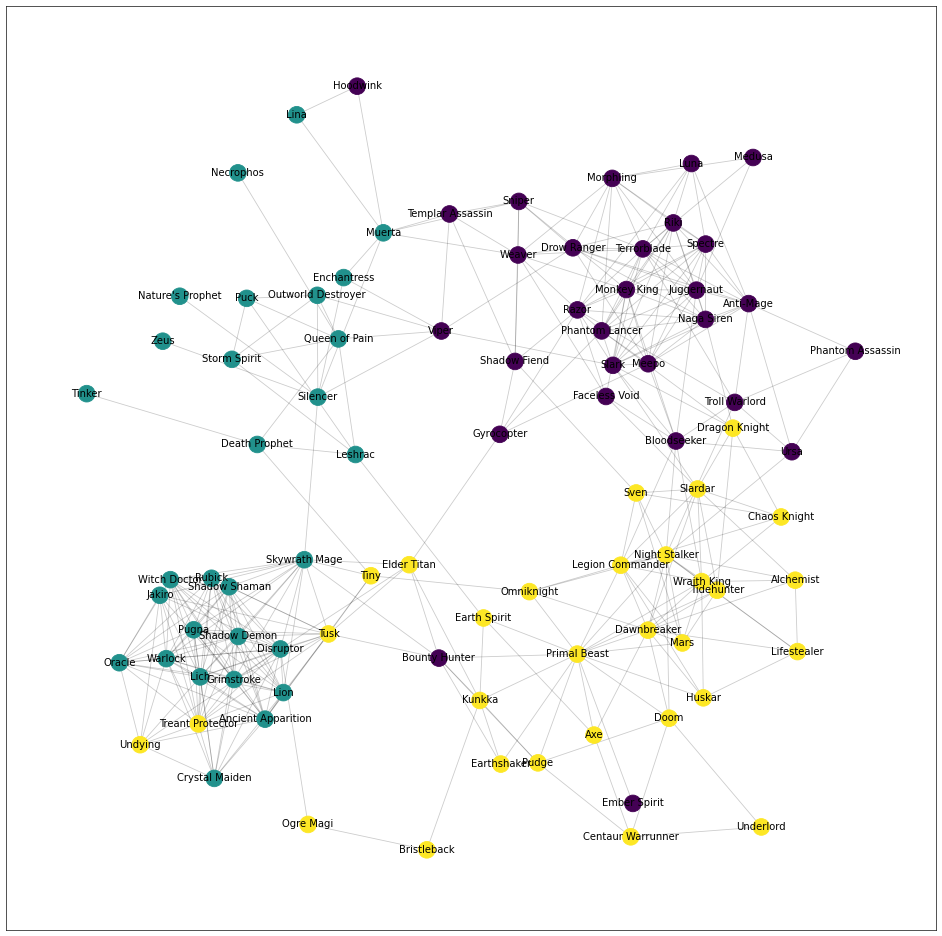

In [37]:
G = pickle.load(open('./data/dota2graph.pickle', 'rb'))
groundTruth = pickle.load(open('./data/groundtruth.txt','rb'))
fig = plt.figure(1, figsize=(20, 20), dpi=60)
#nx.draw(G, pos=layout,with_labels = True, node_size=50, node_color=your_clusters,font_size=8, alpha=0.2)
#layout = nx.spring_layout(H, k=5.15, iterations=20)
layout = nx.kamada_kawai_layout(G)
nx.draw_networkx_edges(G, layout, alpha = 0.2)
nx.draw_networkx_nodes(G, layout, node_color=groundTruth, node_size=400)
nx.draw_networkx_labels(G, layout)

print(np.unique(groundTruth))

### Task 2.2.1 (3 points)
Compute the eigenvectors and eigenvalues (using the provided function) of the Normalized Laplacian and the Random Walk Laplacian of the graph $G$.<br> 
Plot the spectrum (eigenvalues).

<span style='color: green'>**\[Implement\]**</span> the code to compute the different Laplacians. 

In [18]:
def graph_eig(L): 
    """
        Takes a graph Laplacian and returns sorted the eigenvalues and vectors.
    """
    lambdas, eigenvectors = np.linalg.eig(L)
    lambdas = np.real(lambdas)
    eigenvectors = np.real(eigenvectors)
    
    order = np.argsort(lambdas)
    lambdas = lambdas[order]
    eigenvectors = eigenvectors[:, order]
    
    return lambdas, eigenvectors

In [38]:
L_norm = None
L_rw = None
nodeID = pickle.load(open('./data/nodeID.pickle', 'rb'))


### YOUR CODE HERE
def compute_L_norm(G):
    A = nx.to_numpy_array(G) # get adjencency matrix
    D = np.diag([val for (node, val) in G.degree]) # get degree matrix
    I = np.eye(G.number_of_nodes()) # n sized identity matrix
    D_sqrt_inv = np.linalg.inv(np.sqrt(D))

    return I - D_sqrt_inv @ A @ D_sqrt_inv

def compute_L_rw(G):
    A = nx.to_numpy_array(G) # get adjencency matrix
    D = np.diag([val for (node, val) in G.degree]) # get degree matrix
    I = np.eye(G.number_of_nodes()) # n sized identity matrix

    return I - np.linalg.inv(D) @ A
### YOUR CODE HERE

L_norm = compute_L_norm(G)
L_rw = compute_L_rw(G)

eigval_norm, eigvec_norm = graph_eig(L_norm)
eigval_rw, eigvec_rw = graph_eig(L_rw)

plt.figure(0)
plt.plot(eigval_norm, 'b-o', label='Spectrum of Normalized Laplacian', )
plt.legend()
plt.figure(1)
plt.plot(eigval_rw, 'b-o', label='Spectrum of the Random Walk Laplacian')
plt.legend()

NameError: name 'graph_eig' is not defined

### Task 2.2.3 (5 points)
<span style='color: green'>**\[Implement\]**</span> the function ```spect_cluster``` that returns a vector ```y_clust``` in which each entry y_clust\[i\] represents the community assigned to node $i$. The method should be able to handle both the Normalized Laplacian, and the Random Walk Laplacian. You are allowed to use your implementation from the weekly exercises and ```sklearn.cluster.k_means``` for k-means clustering. 

In [20]:
from sklearn.cluster import k_means

def spect_cluster(G, eig_type="normal", k=5, d=5):
    if eig_type == "normal":
        L = compute_L_norm(G)
    else:
        L = compute_L_rw(G)
    
    eigval, eigvec = graph_eig(L)
    T = eigvec[:,0:d]

    _, y_clust, _ = k_means(T, n_clusters=k, n_init="auto")
    return y_clust

c:\Users\sofie\anaconda3\envs\dm24\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


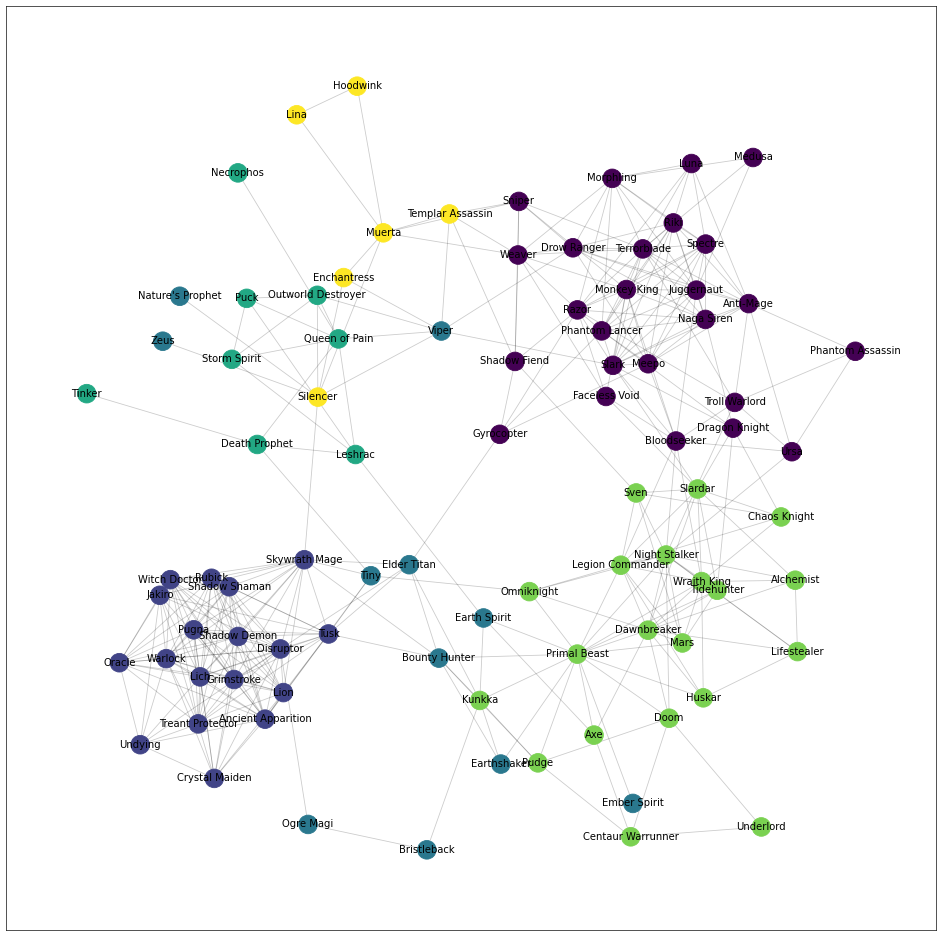

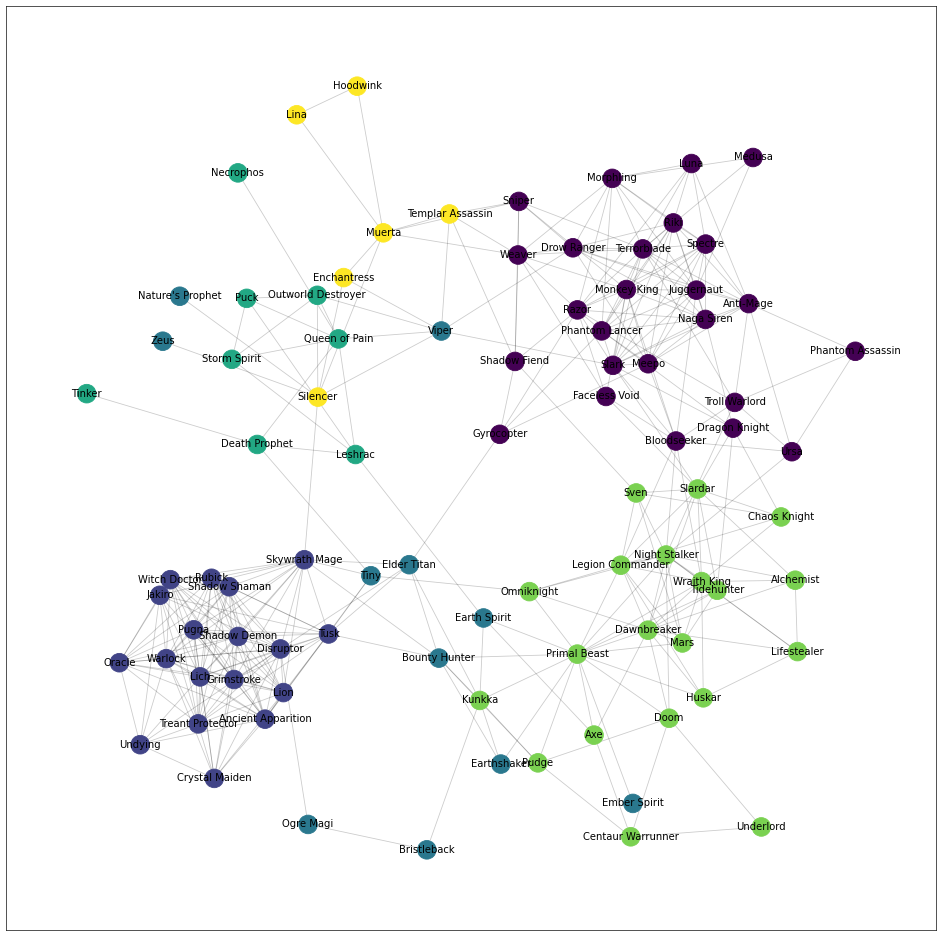

In [21]:
def plot_graph(G, clusters):
    fig = plt.figure(1, figsize=(20, 20), dpi=60)
    #nx.draw(G, pos=layout,with_labels = True, node_size=50, node_color=your_clusters,font_size=8, alpha=0.2)
    #layout = nx.spring_layout(H, k=5.15, iterations=20)
    layout = nx.kamada_kawai_layout(G)
    nx.draw_networkx_edges(G, layout, alpha = 0.2)
    nx.draw_networkx_nodes(G, layout, node_color=clusters, node_size=500)
    nx.draw_networkx_labels(G, layout)

    return fig

your_clusters = spect_cluster(G, k=6)   
plot_graph(G, your_clusters)


### Task 2.2.5 (2 points)

Finally, use your implementation of spectral clustering with different Laplacians and different values of $k \in [2,7]$ and plot the results using the helper function ```plot_graph```. 

<span style='color: green'>**\[Motivate\]**</span> the results you obtain. Especially, what is the difference between the Random Walk and the Normalized Laplacians, if any? How do you explain such differences? Can you detect easily all the ground truth communities? Are some communities not detected? Why do you think that happens? 

c:\Users\sofie\anaconda3\envs\dm24\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\sofie\anaconda3\envs\dm24\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\sofie\anaconda3\envs\dm24\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\sofie\anaconda3\envs\dm24\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans 

c:\Users\sofie\anaconda3\envs\dm24\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\sofie\anaconda3\envs\dm24\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\sofie\anaconda3\envs\dm24\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\sofie\anaconda3\envs\dm24\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans 

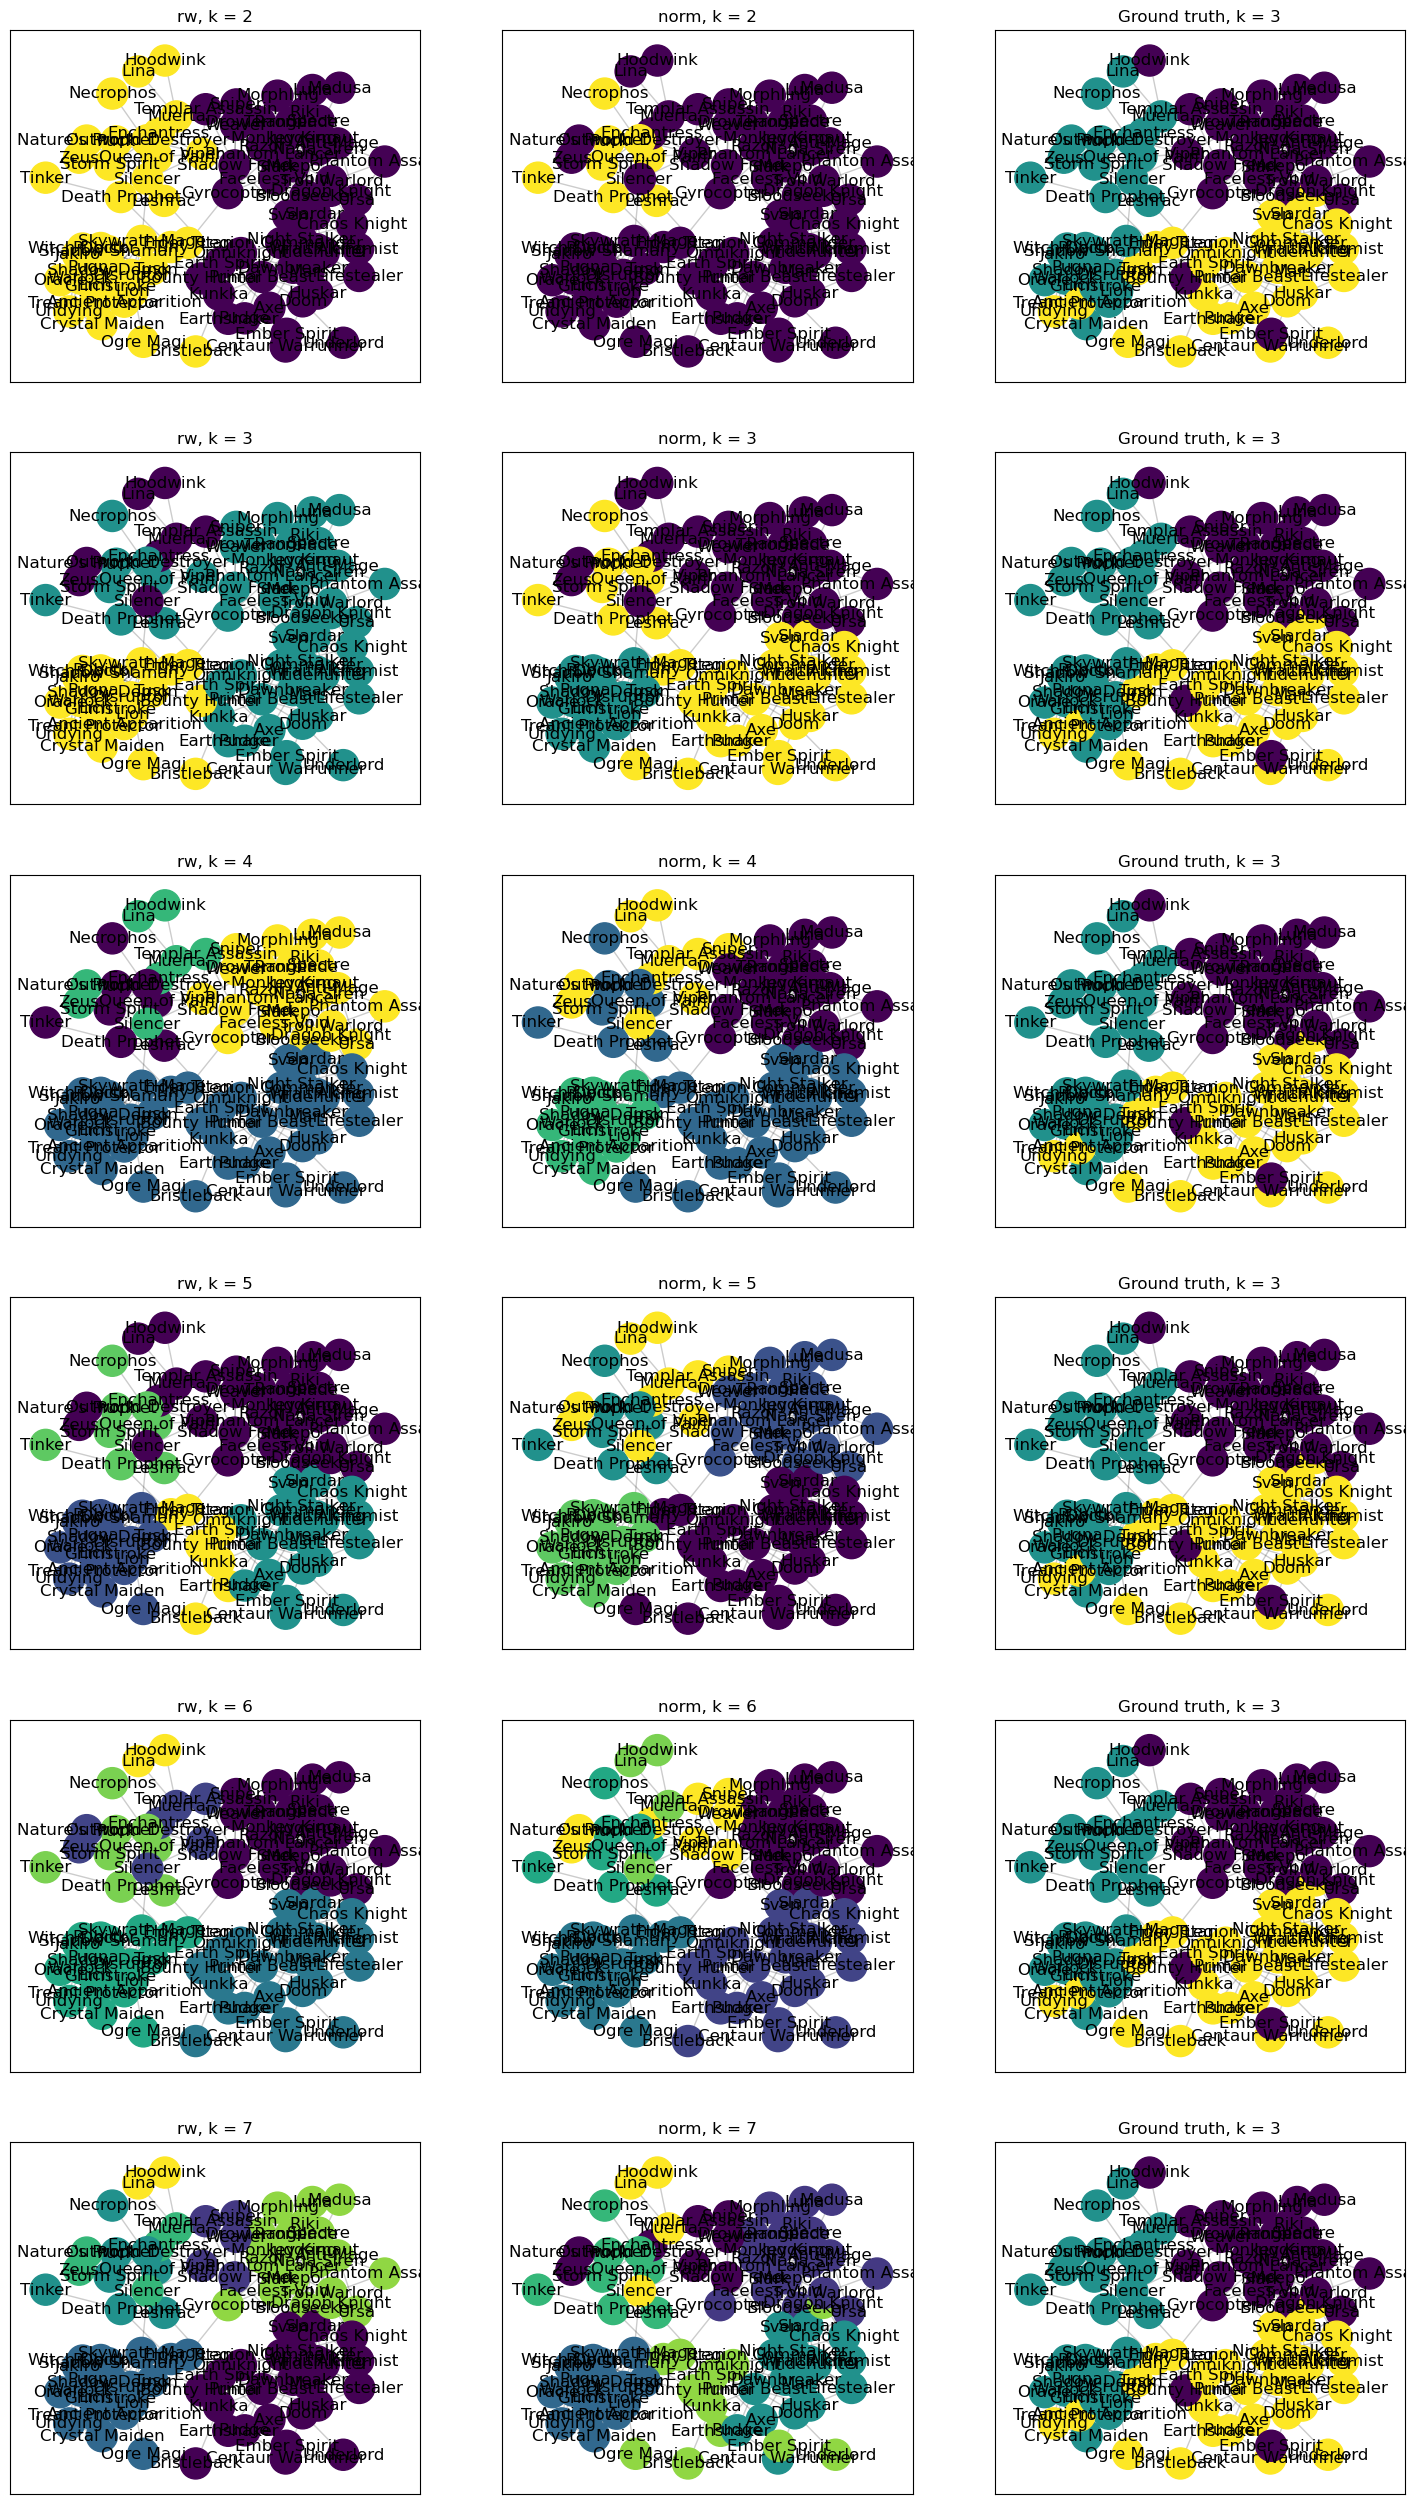

In [25]:
fig, axs = plt.subplots(ncols=3, nrows=6, figsize=(18, 32))

for i in range(6):
    
    clusters_norm = spect_cluster(G, k=i+2) 
    clusters_rw = spect_cluster(G, k=i+2, eig_type=None) 
    plt.subplot(6, 3, 3*i+2)
    plot_graph(G, clusters_norm, node_size=200, labels=False)
    plt.title(f'norm, k = {i + 2}')

    plt.subplot(6, 3, 3*i + 1)
    plot_graph(G, clusters_rw, node_size=200, labels=False)
    plt.title(f'rw, k = {i + 2}')

    plt.subplot(6, 3, 3*i + 3)
    plot_graph(G, groundTruth, node_size=200, labels=False)
    plt.title(f'Ground truth, k = 3')


******************
It can be seen that Random Walk and normalized laplacian does give slighly different clusterings, which is more visible when the number of clusters is low. It seems random walk captures highly connected areas/nodes more, compared to using normalized laplacian, which doesn't appear to emphasize highly connected regions as much. 

This could be due to the nature of random walk, which will emphasize nodes that are easily reachable from each other, and result in these nodes obtaining similar values in the laplacian. Whereas the normalized laplacian emphasizes relative connections between nodes instead of absolute connectivity, meaning it doesn't only consider whether two nodes are connected, but also weighs the connection compared to the overall connectivity of the nodes involved, hence it isn't as sensitive to densely connected regions.

It seems normalized laplacian better captures the true clustering, but neither method is able to capture the overlapping between communities. Moreover, when choosing a higher number of k, clustering on areas of the network that are particularly sparse becomes odd.

******************

### Task 2.2.6 (5 points)
<span style='color: green'>**\[Implement\]**</span> the modularity. Recall that the definition of modularity for a set of communities $C$ is
$$ 
Q=\frac{1}{2 m} \sum_{c \in C} \sum_{i \in c} \sum_{j \in c}\left(A_{i j}-\frac{d_{i} d_{j}}{2 m}\right) \qquad \qquad (1) 
$$
where $A$ is the adjacency matrix, and $d_i$ is the degree of node $i$

**Note**: Use ```plot_graph``` function in order to see for yourself if maximising modularity leads a better clustering. If you did not succeed with the previous Task you are allowed to use [Scikit Learn Spectral Clustering](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.SpectralClustering.html)

In [23]:
def modularity(G, clustering):
    #IDnode = pickle.load(open('./data/IDnode.pickle', 'rb'))

    m = G.number_of_edges()
    A = nx.to_numpy_array(G) # get adjencency matrix
    d = np.array([val for (node, val) in G.degree]) # get degrees matrix   
    clustering = np.array(clustering)

    dd = np.outer(d, d) /(2*m)
    match = (clustering[:, None] == clustering[None, :]).astype(int)

    return np.sum((A-dd)*match)/(2*m)

c:\Users\sofie\anaconda3\envs\dm24\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\sofie\anaconda3\envs\dm24\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\sofie\anaconda3\envs\dm24\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\sofie\anaconda3\envs\dm24\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans 

c:\Users\sofie\anaconda3\envs\dm24\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\sofie\anaconda3\envs\dm24\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\sofie\anaconda3\envs\dm24\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\sofie\anaconda3\envs\dm24\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans 

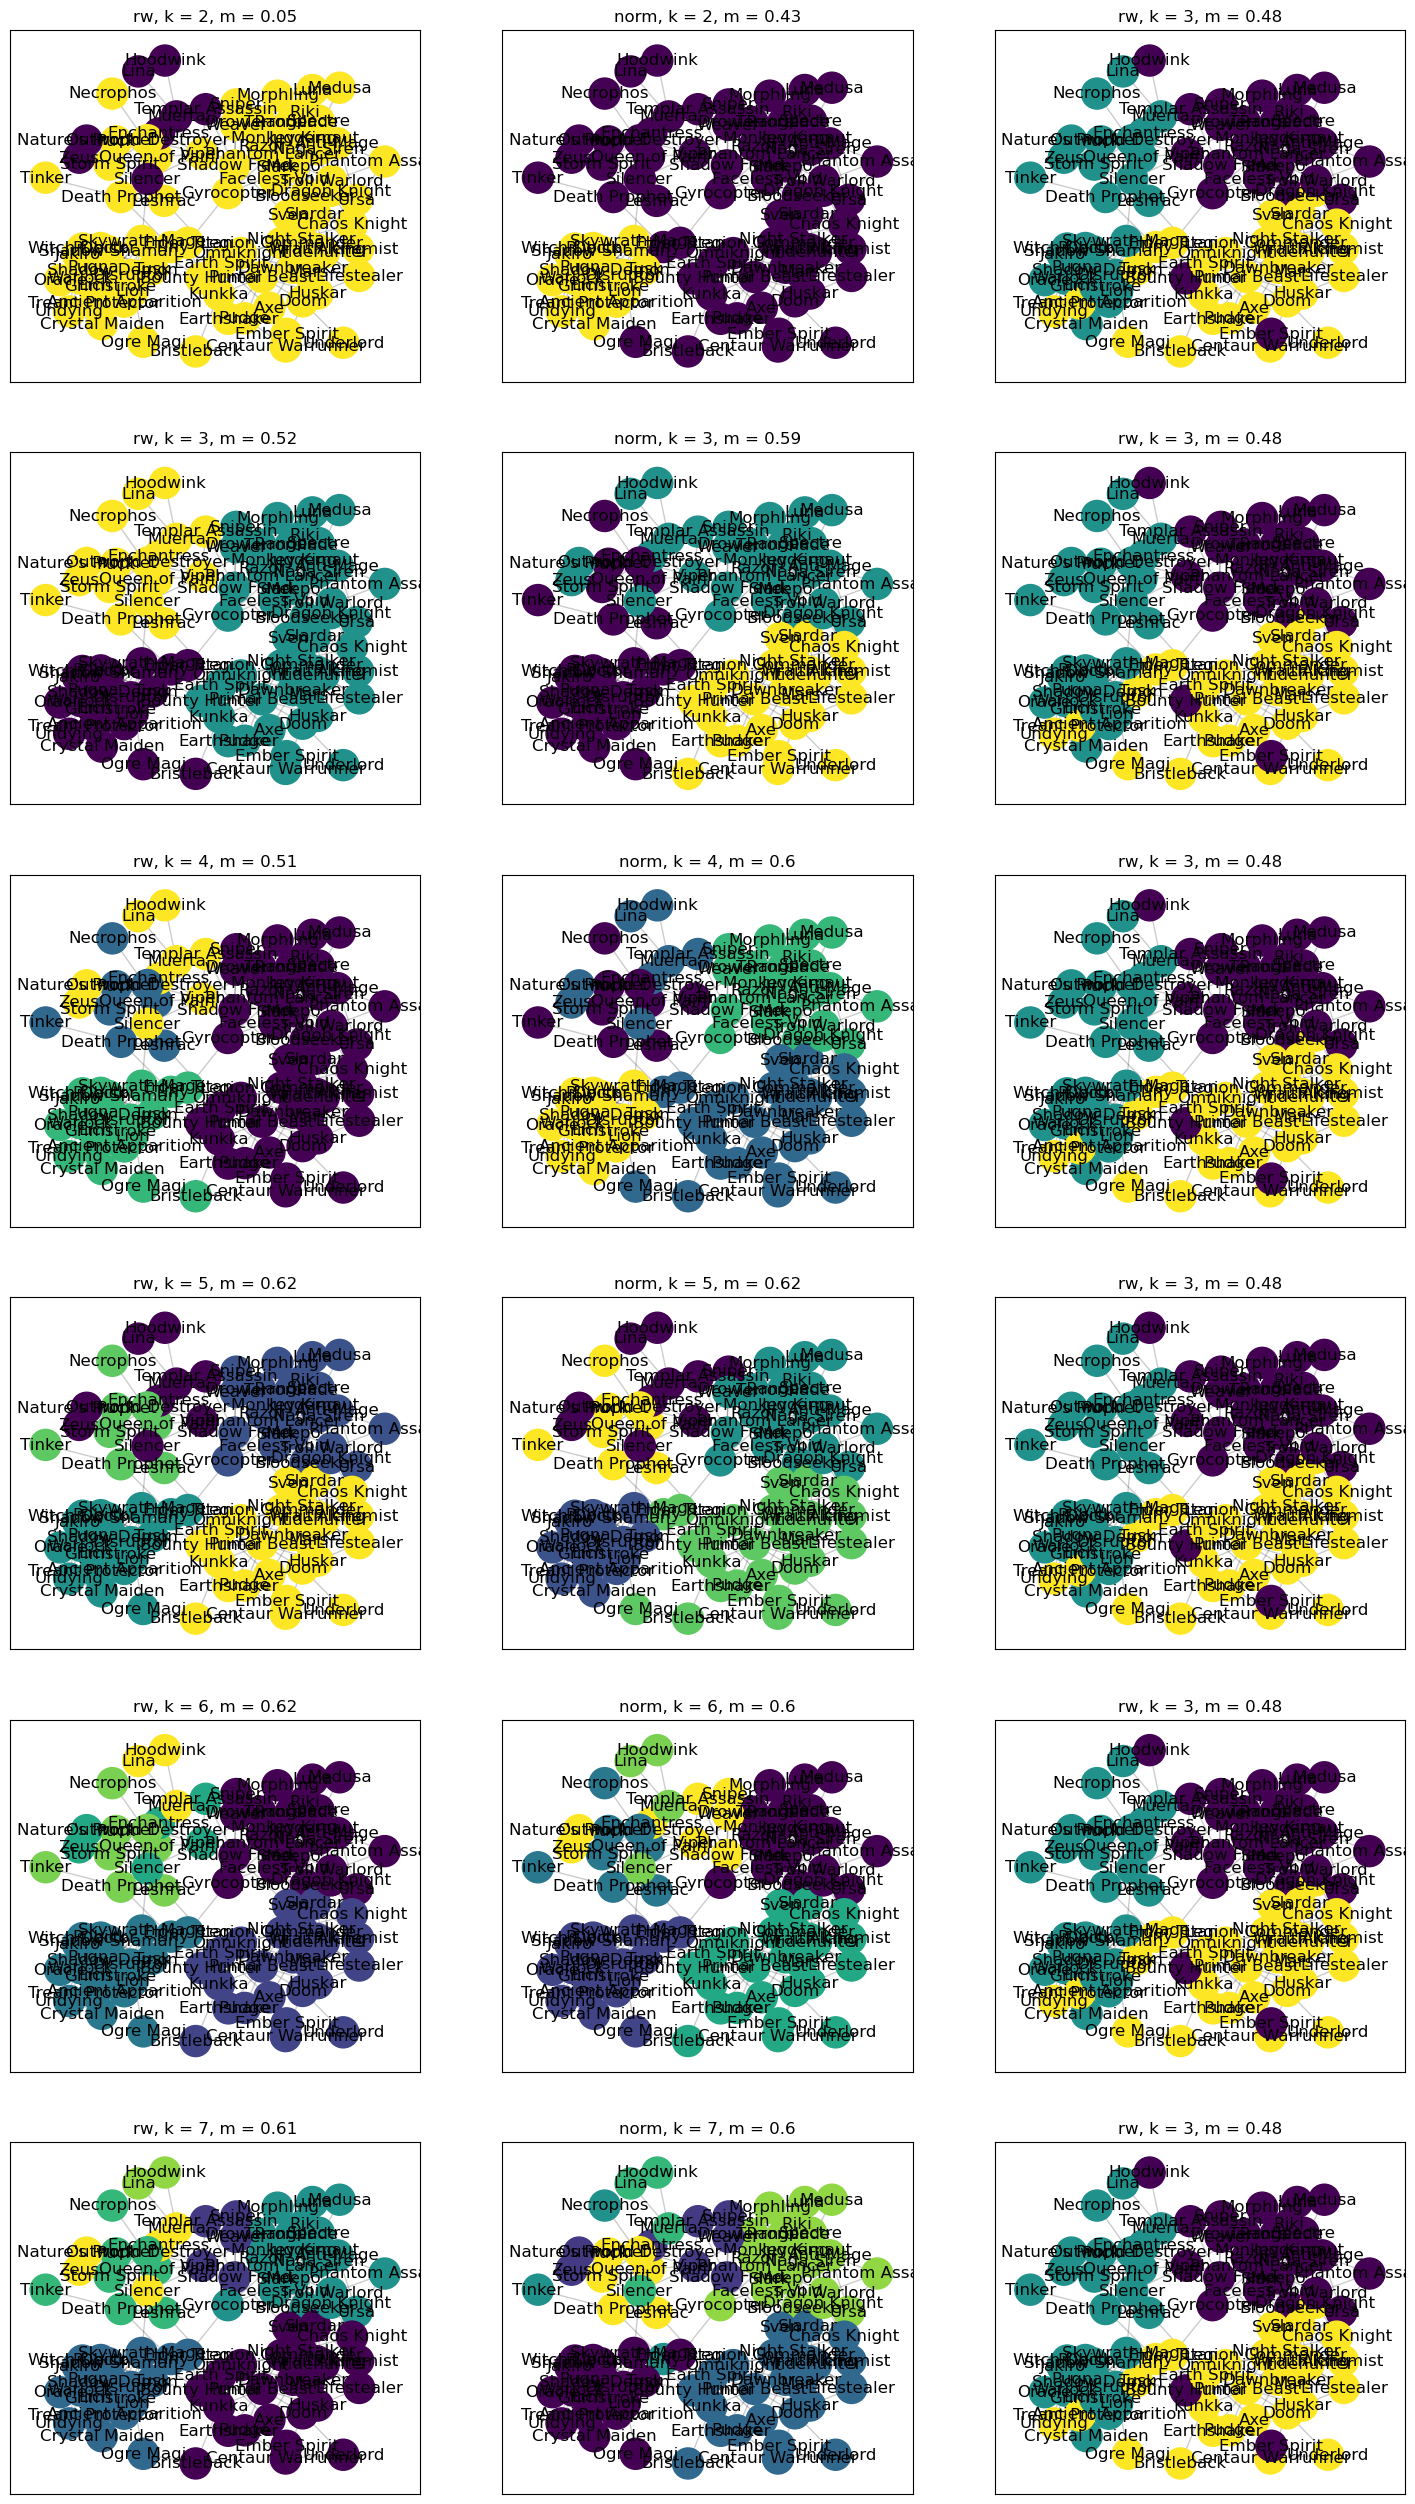

In [ ]:

fig, axs = plt.subplots(ncols=3, nrows=6, figsize=(18, 32))

for i in range(6):
    
    clusters_norm = spect_cluster(G, k=i+2) 
    clusters_rw = spect_cluster(G, k=i+2, eig_type=None) 
    plt.subplot(6, 3, 3*i+2)
    plot_graph(G, clusters_norm, node_size=200, labels=False)
    m_norm = modularity(G, clusters_norm)
    plt.title(f'norm, k = {i + 2}, m = {round(m_norm, ndigits=2)}')

    plt.subplot(6, 3, 3*i + 1)
    m_rw = modularity(G, clusters_rw)
    plot_graph(G, clusters_rw, node_size=200, labels=False)
    plt.title(f'rw, k = {i + 2}, m = {round(m_rw, ndigits=2)}')

    plt.subplot(6, 3, 3*i + 3)
    m_gt = modularity(G, groundTruth)
    plot_graph(G, groundTruth, node_size=200, labels=False)
    plt.title(f'rw, k = 3, m = {round(m_gt, ndigits=2)}')

### Task 2.2.5 (3 points)

Compute the modularity of your Spectral Clustering Implementation for different values of $k$. 

<span style='color: green'>**\[Motivate\]**</span> which value maximises the modularity. Is $k=6$ maximizing the modularity? If yes, is this consistent with the ground-truth? If not, is it because of an issue with modularity or with spectral clustering? 

c:\Users\sofie\anaconda3\envs\dm24\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\sofie\anaconda3\envs\dm24\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\sofie\anaconda3\envs\dm24\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\sofie\anaconda3\envs\dm24\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans 

[3.8629677843121887e-17, 0.38255207355976734, 0.3725614561831488, 0.5977669356352037, 0.6216438356164383, 0.6125989866766748, 0.5691536873709889]


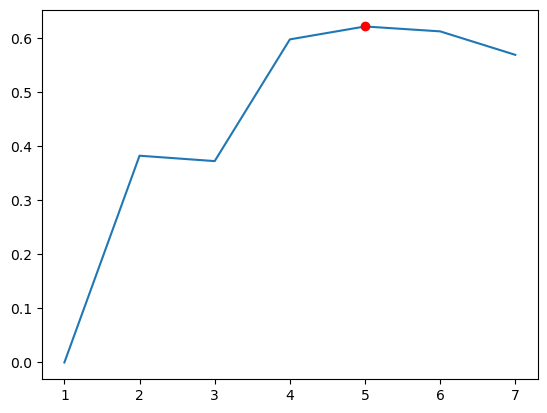

In [24]:
mods = []
ks = [1, 2, 3, 4, 5, 6, 7]
for k in ks:
    clusters = spect_cluster(G, k=k) ### NOTE: If you do not use your implementation substitute with a call to the sklearn one. 
    mods.append(modularity(G, clusters))

# You may want to use plt.plot to plot the modularity for different values of k
plt.plot(ks, mods)
plt.plot(np.argmax(mods) + 1, max(mods), 'ro')
print(mods)

******************

The modullarity is maximized by choosing k with a value between 4 - 6. This is not consistent with the ground truth, which has a k value of 3. This could be due to a combination of both the clustering and the modularity measure. Modularity does not take ground truth into consideration as a clustering evaluation measure, but evaluates how well a network is partitioned into densely connected groups, meaning if there exists densely connected subgroups within a true cluster, it will favor including the densely connected supgrouop as it its own cluster, ie favor a larger number of k if this is the case.

Moreover, spectral clustering does not appear to create as clear a clustering for k = 3 compared to having  5 - 6 clusters, where there is smaller more densely connected regions, which is favored by the modularity measure.

******************

### Task 2.2.6 (2 points)

<span style='color: green'>**\[Motivate\]**</span> There seems to be a relationship between graph embeddings and spectral clustering, can you guess that? _Hint_: Think to the eigenvectors of the graph's Laplacians.

* [X] If the embeddings are linear and the similarity is the Laplacian, the embeddings we obtain minimizing the $L_2$ norm are equivalent to the eigenvectors of the Laplacian. 
* [ ] If the embeddings are random-walk-based embeddings, the eigenvectors of the Random Walk Laplacian are related to the embeddings obtained by such methods. 
* [ ] The relationship is just apparent. 
* [ ] If the embeddings are linear and the similarity is the Adjacency matrix, the eigenvectors of the Laplacian are equivalent to the embeddings. 

******************
In linear embedding minimizing the $L_2$ distance between the dot product of the embedded vectors $z_i^Tz_j$ and the similarity measure of the laplacian $L_{ij}$ results in an equation resembling an eigenvalue problem, where the embedding matrix is equivalent to the eigenvectors of the laplacian.

******************

# Part 3: Link analysis
In this exercise, we will work with PageRank, Random Walks and their relationships with graph properties. 
We will use the most generic definition

$$\mathbf{r} = \alpha \mathbf{Mr} + (1-\alpha)\mathbf{p}$$

with $\mathbf{r}$ the PageRank vector, $\mathbf{M}$ the weighted transition matrix, and $\mathbf{p}$ the personalization vector. 
Additionally, let $n = |V|$, where $V$ is the nodes in the graph above.
Remember that in the case of PageRank the entries of the personalization vector are $p_i = 1/n$ for all $i$.  


## Task 3.1 Approximate PageRank (15 points)

### Task 3.1.1 (8 points)

<span style='color: green'>**\[Implement\]**</span>  a different algorithm for computing Personalized PageRank. This algorithm runs a fixed number of iterations and uses the definition of random walks. 
At each step, the algorithm either selects a random neighbor with probability $\alpha$ or returns to the starting node with probability $1-\alpha$. Every time a node is visited a counter on the node is incremented by one. Initially, each counter is 0. The final ppr value is the values in the nodes divided by the number of iterations. 

In [ ]:
import random
def approx_personalized_pagerank(G, node, alpha = 0.85, iterations = 1000): 
    ppr = np.zeros(G.number_of_nodes())
    t_node = node

    for _ in range(iterations):
        if np.random.random() < 1 - alpha: 
            t_node = node
        else:
            neighbors = list(G[t_node])
            if neighbors:  # Ensure there are neighbors
                t_node = random.choice(neighbors)

        idx = list(G.nodes()).index(t_node)
        ppr[idx] += 1

    return ppr/iterations


approx_personalized_pagerank(G, 'Anti-Mage', alpha = 0.85, iterations = 1000)

array([0.19 , 0.004, 0.022, 0.   , 0.021, 0.   , 0.04 , 0.022, 0.006,
       0.03 , 0.002, 0.001, 0.035, 0.001, 0.004, 0.002, 0.   , 0.   ,
       0.001, 0.   , 0.001, 0.017, 0.009, 0.   , 0.001, 0.044, 0.004,
       0.008, 0.   , 0.001, 0.004, 0.014, 0.01 , 0.007, 0.027, 0.   ,
       0.004, 0.004, 0.024, 0.012, 0.001, 0.   , 0.001, 0.006, 0.002,
       0.003, 0.017, 0.001, 0.017, 0.   , 0.039, 0.002, 0.004, 0.029,
       0.009, 0.005, 0.001, 0.002, 0.   , 0.004, 0.037, 0.001, 0.   ,
       0.001, 0.002, 0.001, 0.039, 0.054, 0.006, 0.03 , 0.001, 0.   ,
       0.   , 0.002, 0.001, 0.007, 0.   , 0.002, 0.   , 0.037, 0.001,
       0.03 , 0.   , 0.001, 0.007, 0.014, 0.007, 0.004])

### Task 3.1.2 (3 points)

Run the ```approx_personalized_pagerank``` with default $\alpha$ and iterations $\{10, n, 2n, 4n, 100n, 1000n\}$ where $n$ is the number of nodes in the graph and starting node the node with the highest PageRank computed in Task 3.1.2.

<span style='color: green'>**\[Motivate\]**</span> what you notice as the number of iterations increase. Why are the values and the top-10 nodes ranked by PPR changing so much? 

In [ ]:
edgelist = read_edge_list('./Data/edges.txt')
n = np.max(edgelist)+1
G = nx.Graph()
for i in range(n):
    G.add_node(i)
for edge in edgelist:
    G.add_edge(edge[0], edge[1])
starting_node = np.argmax(nx.pagerank(G))
for i, iterations in enumerate([10, G.number_of_nodes(), G.number_of_nodes()*2, G.number_of_nodes()*4, G.number_of_nodes()*100, G.number_of_nodes()*1000]):
    r = approx_personalized_pagerank(G, starting_node, iterations = iterations)
    r[starting_node] = 0
    r_sorted = np.argsort(r)[::-1]
    r_values = np.sort(r)[::-1]
    print(f'Iteration {iterations}: top-10 r={r_sorted[:10]}\n top-10 values={r_values[:10]}\n')

import operator
rr = nx.pagerank(G, alpha=0.85, personalization = {starting_node: 1})
rr[starting_node] = 0
r=np.zeros(len(rr))
for k in rr: r[k] = rr[k]
r_sorted = np.argsort(r)[::-1]
r_values = np.sort(r)[::-1]
print(f'top-10 r={r_sorted[:10]}\n top-10 values={r_values[:10]}\n')

Iteration 10: top-10 r=[ 15  40  41  37  18  17 106 101 102 103]
 top-10 values=[0.2 0.1 0.1 0.1 0.1 0.1 0.  0.  0.  0. ]

Iteration 307: top-10 r=[39 40 41 18 42 15 36 44 57 37]
 top-10 values=[0.08143322 0.07166124 0.06840391 0.06514658 0.06188925 0.05211726
 0.05211726 0.04885993 0.04234528 0.02605863]

Iteration 614: top-10 r=[40 39 42 36 41 18 15 44 57 17]
 top-10 values=[0.08143322 0.07003257 0.06188925 0.05863192 0.05863192 0.05700326
 0.05537459 0.04723127 0.04560261 0.03420195]

Iteration 1228: top-10 r=[39 41 40 18 15 42 36 44 57 37]
 top-10 values=[0.07084691 0.06677524 0.06433225 0.06351792 0.05456026 0.05456026
 0.04478827 0.04234528 0.03827362 0.03745928]

Iteration 30700: top-10 r=[39 40 41 18 15 42 36 44 57 17]
 top-10 values=[0.07472313 0.06938111 0.06938111 0.0632899  0.05970684 0.05641694
 0.05026059 0.04400651 0.04332248 0.03439739]

Iteration 307000: top-10 r=[39 40 41 18 42 15 36 44 57 17]
 top-10 values=[0.07385016 0.06828013 0.06761238 0.06419544 0.05810423 0.05

******************
For iterations smaller than the number of nodes, the random walk algorithm would not have the opportunity to visit all nodes within reach, and hence which nodes that have visitied the most is highly dependable on the startnode and the nodes that can be reached from here. Same goes for a number of iterations that are not many times bigger than the number of nodes in the graph, since the probability of nodes being visited many times is small, and therefore the ranking is still quite dependent on randomness. The more iterations, the more clear and stable the pattern becomes.
******************

### Task 3.1.3 (2 points)

Compare the 5 nodes with the highest PPR obtained from ```nx.pagerank(G, alpha=0.85, personalization={node_highest_pagerank: 1})``` and the one obtained by the approximation. 

<span style='color: green'>**\[Motivate\]**</span> the differences. Do the iterations affect the results? Is there a relationship between the number of iterations and the results? Is there a relationship between the approximated value of PageRank and the real value? Do you notice anything as the number of iteration increases? 

In [ ]:
k = 5
ppr_nx = nx.pagerank(G, alpha=0.85, personalization = {starting_node: 1})
r_nx = [0 for _ in range(G.number_of_nodes())]
for k, v in ppr_nx.items():
    r_nx[k] = v
r_est = approx_personalized_pagerank(G, starting_node, alpha=0.85)

topk_nx = np.argsort(r_nx)[-5:]
topk_est = np.argsort(r_est)[-5:]

print(topk_nx, topk_est)

for iterations in [10, G.number_of_nodes(), G.number_of_nodes()*2, G.number_of_nodes()*4, G.number_of_nodes()*100, G.number_of_nodes()*1000]:
    print(f'Number of iterations {iterations}')
    ppr_nx = nx.pagerank(G, alpha=0.85, personalization = {starting_node: 1})
    r_nx = [0 for _ in range(G.number_of_nodes())]
    for k, v in ppr_nx.items():
        r_nx[k] = v
    r_est = approx_personalized_pagerank(G, starting_node, iterations = iterations, alpha=0.85)
    print(f'Approximate PPR: {r_est[:10]}')
    print(f'Real PPR: {r_nx[:10]}')
    
    
    topk_nx = np.argsort(r_nx)[-5:]
    topk_est = np.argsort(r_est)[-5:]

    print(f"Topk of nx.pagerank: {topk_nx}, Topk of our estimation {topk_est}, Size of intersection: {len(set(topk_nx).intersection(set(topk_est)))}")

[18 41 40 39  0] [41 18 40 39  0]
Number of iterations 10
Approximate PPR: [0.2 0.  0.  0.  0.  0.  0.  0.  0.  0. ]
Real PPR: [0.20102640550640022, 0.0004761511237216732, 0.001421044532107968, 0.00517928011352294, 0.0010162923813859888, 0.0006924636204434976, 0.000586579792176299, 0.000586579792176299, 0.0003234474438257967, 0.00019090839324436927]
Topk of nx.pagerank: [18 41 40 39  0], Topk of our estimation [251 250  36  41   0], Size of intersection: 2
Number of iterations 307
Approximate PPR: [0.20846906 0.         0.         0.00325733 0.         0.
 0.         0.         0.         0.        ]
Real PPR: [0.20102640550640022, 0.0004761511237216732, 0.001421044532107968, 0.00517928011352294, 0.0010162923813859888, 0.0006924636204434976, 0.000586579792176299, 0.000586579792176299, 0.0003234474438257967, 0.00019090839324436927]
Topk of nx.pagerank: [18 41 40 39  0], Topk of our estimation [40 42 41 39  0], Size of intersection: 4
Number of iterations 614
Approximate PPR: [0.15960912

*****************
As the number of iterations increases, the 5 highest ranking nodes from the approximation becomes more similar to the real 5 highest ranking nodes, as well does their PageRanking value. As described in the task above, the more iterations used in the approximation, the less the ranking is determined by randomness and begin to show a more stable pattern/ranking.
*****************

### Task 3.1.4 (2 points)

Run again the same experiment but this time use $\alpha = 0.1$. 

<span style='color: green'>**\[Motivate\]**</span> Motivate whether and why you need more or less iterations to predict the 5 nodes with the highest PPR.

In [ ]:
for iterations in [10, G.number_of_nodes(), G.number_of_nodes()*2, G.number_of_nodes()*4, G.number_of_nodes()*100]:
    ppr_nx = nx.pagerank(G, alpha=0.1, personalization = {starting_node: 1})
    r_nx = [0 for _ in range(G.number_of_nodes())]
    for k, v in ppr_nx.items():
        r_nx[k] = v
    r_est = approx_personalized_pagerank(G, starting_node, iterations = iterations, alpha=0.1)

    topk_nx = np.argsort(r_nx)[-5:]
    topk_est = np.argsort(r_est)[-5:]

    print(f"Topk of nx.pagerank: {topk_nx}, Topk of our estimation {topk_est}, Size of intersection: {len(set(topk_nx).intersection(set(topk_est)))}")
    

Topk of nx.pagerank: [40 41 42 39  0], Topk of our estimation [81 80 18 36  0], Size of intersection: 1
Topk of nx.pagerank: [40 41 42 39  0], Topk of our estimation [41 39 40 44  0], Size of intersection: 4
Topk of nx.pagerank: [40 41 42 39  0], Topk of our estimation [39 57 36 42  0], Size of intersection: 3
Topk of nx.pagerank: [40 41 42 39  0], Topk of our estimation [39 40 18 41  0], Size of intersection: 4
Topk of nx.pagerank: [40 41 42 39  0], Topk of our estimation [15 42 40 39  0], Size of intersection: 4


*****************
When decreasing the parameter $\alpha$, the approximation requires more iterations to converge. This is due to the random walk having a large probability (1 - $\alpha$) of randomly teleporting back to the start node. This means the random walk has a lower probability of visiting nodes further from the start node and a lower probablility of re-visiting the same nodes multiple times. Hence it takes more iterations for the ranking to converge.
*****************

## Task 3.2 Spam and link farms (19 points)

We will now study the effect of spam in the network and construct a link farm. In this part, if you want to modify the graph, use a copy of the original graph every time you run your code, so that you do not keep adding modifications.

In [2]:
edgelist = read_edge_list('./Data/edges.txt')
n = np.max(edgelist)+1
G2 = nx.Graph()
for i in range(n):
    G2.add_node(i)
for edge in edgelist:
    G2.add_edge(edge[0], edge[1])
    
G = G2.copy()

### Task 3.2.1 (4 points)
Based on the analysis in the slides, construct a spam farm $s$ on the graph $G$ with $T$ fake nodes. Assume that $s$ manages to get links from node 1. With $\alpha=0.5$, 

<span style='color: green'>**\[Motivate\]**</span> which is the minimum number of pages $T$ that we you need to add in order to get $s$ being assigned the highest PageRank?

In [55]:
spam_G = G.copy()
T = 1

# Add spam node
spam_G.add_node("s")
spam_G.add_edge(1, "s")

while True:
    spam_G.add_node(f"T{T}")
    spam_G.add_edge("s", f"T{T}")
     
    ppr_nx = nx.pagerank(spam_G, alpha=0.5)
    max_ranking = max(ppr_nx, key = ppr_nx.get)

    if max_ranking == "s":
        break
    T += 1


In [ ]:
print(f"Max ranking node {max_ranking} with number of pages T = {T}")

Max ranking node s with number of pages T = 3


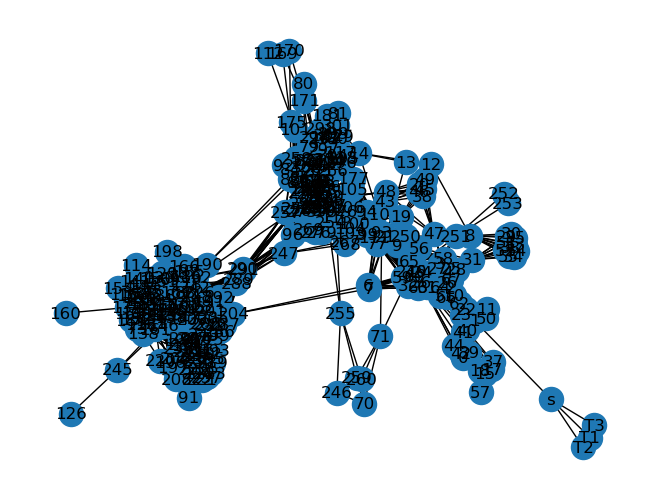

In [ ]:
nx.draw(spam_G, with_labels=True)

*******************
As computed using the code above, the minimum number of pages needed to get s being assigned the highest pageRank is 3.
*******************

### Task 3.2.2 (4 points)
In the above scenario, assume that $T = \frac{1}{5}$ of the nodes in the original graph. 

<span style='color: green'>**\[Motivate\]**</span> what value of $\alpha$ will maximize the PageRank $\mathbf{r}_s$ of the link farm $s$. Provide sufficient justification for your choice.

*******************
<span style="color:red">**YOUR ANSWER HERE**</span>
*******************

### Task 3.2.3 (8 points)

Now we fix both $\alpha = 0.85$ and $T = \frac{1}{5}n$. 

<span style='color: green'>**\[Implement\]**</span>  ```trusted_pagerank``` the method for spam mass estimation.

In [4]:
def trusted_pagerank(G, trusted_indices, iterations=500, alpha=0.85):
    r = None
    
    ### YOUR CODE HERE
    # cf. 8.2.3 of lecture notes
    n = G.number_of_nodes()
    m = len(trusted_indices)

    r_x = nx.pagerank(G, alpha=alpha, max_iter=iterations)

    tp_dict = dict() 
    for u in range(n):
        if u in trusted_indices:
            tp_dict[u] = 1/m
        else:
            tp_dict[u] = 0
    

    r_x_plus = nx.pagerank(G, alpha=alpha, max_iter=iterations, personalization=tp_dict)
    r_x_minus = [r_x[u] - r_x_plus[u] for u in range(n)]
    x = [r_x_minus[u] / r_x[u] for u in range(n)]
    r = x
    ### YOUR CODE HERE
    return r

### Task 3.2.4 (3 points)

<span style='color: green'>**\[Discuss\]**</span> whether we are able to detect the node $s$, if the trusted set of nodes is a random sample $10\%$ of the nodes in the original graph. 
If not, what could be a viable solution? Which nodes would you rather choose as trusted?

You are not obliged to, but you can write some helper code to reach the answer faster.  

_Hint_: Remember the spam mass formula in the Link Analysis lecture

[307, 308, 309, 310, 311, 312, 313, 314, 315, 316, 317, 318, 319, 320, 321, 322, 323, 324, 325, 326, 327, 328, 329, 330, 331, 332, 333, 334, 335, 336, 337, 338, 339, 340, 341, 342, 343, 344, 345, 346, 347, 348, 349, 350, 351, 352, 353, 354, 355, 356, 357, 358, 359, 360, 361, 362, 363, 364, 365, 366, 367, 368]


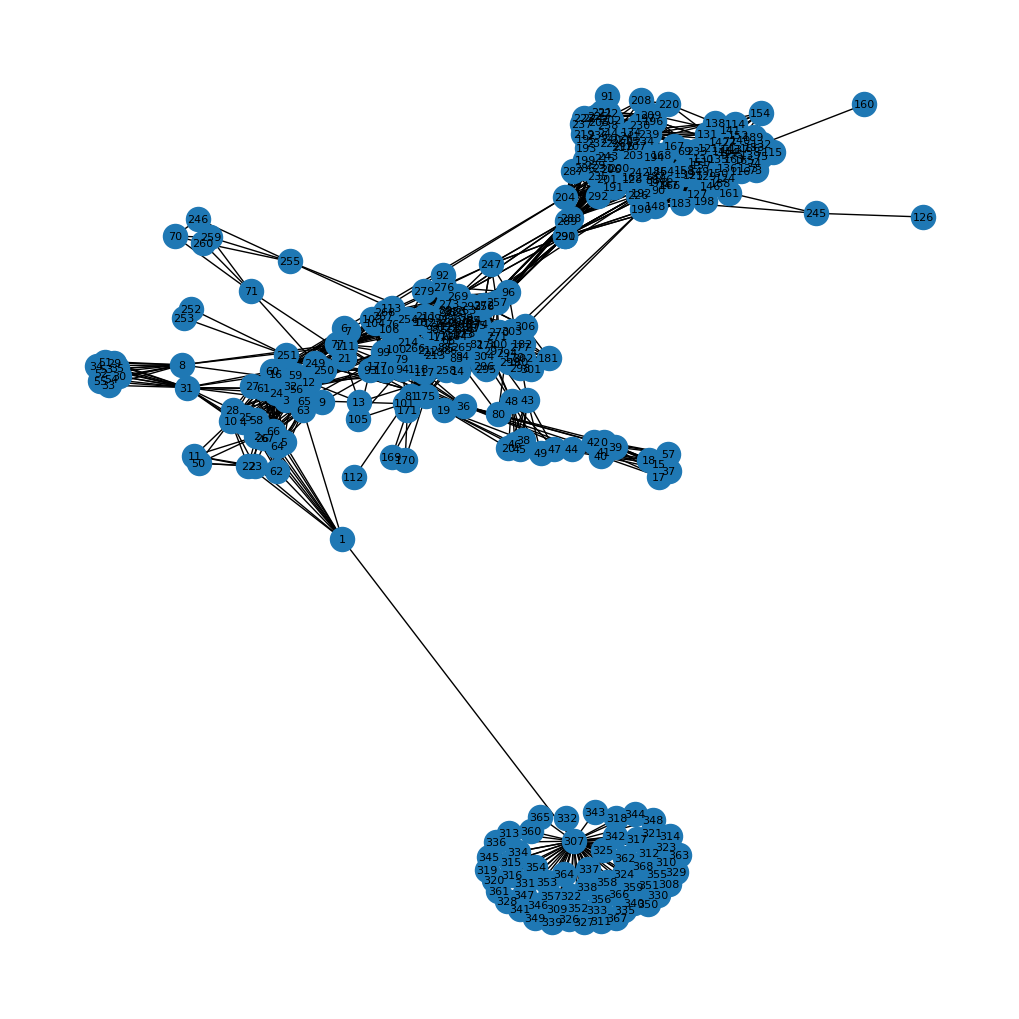

In [35]:
# selecting trusted indices 
from random import sample
n = G.number_of_nodes()
trusted_indices = sample(range(n), n//10 + 1)

spam_G = G.copy()
S = n 
# Add spam node
spam_G.add_node(S)
spam_G.add_edge(1, S)

for T in range(n+1, n + (n//5)+1):
    spam_G.add_node(T)
    spam_G.add_edge(S, T)

max_spam_mass = trusted_pagerank(spam_G, trusted_indices)
print([i for i, x in enumerate(max_spam_mass) if x >= 0.95])

plt.figure(figsize=(10,10)) 
nx.draw(spam_G, with_labels=True,font_size=8)

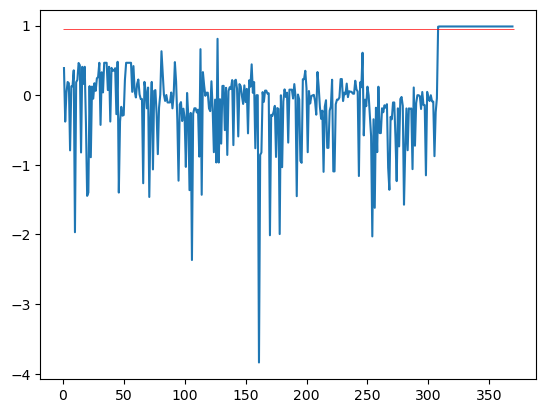

In [36]:
plt.plot(range(1, spam_G.number_of_nodes()+1), trusted_pagerank(spam_G, trusted_indices))
plt.hlines(y=0.95, xmin=0, xmax=370, linewidth=0.5, color='r')

*******************
Yes, it is possible with 10% trusted nodes to capture the majority (if not all) of the spam nodes with a sufficiently high threshold, as illustrated in the figure above. However, it should be noted that the chosen threshold may result in 'real' nodes being marked as spam if not chosen appropriately, which can be difficult in real world cases.

10% is sufficient, however, with even a higher number of trusted pages it becomes easier to detect spam nodes.
******************

# Part 4: Graph embeddings (16 points)
In this final part, we will try a different approach for clustering the data from above. 
The strategy is going to be the following:

1. Use VERSE [[1]](https://arxiv.org/pdf/1803.04742.pdf) to produce embeddings of the nodes in the graph.
2. Use K-Means to cluster the embeddings. Measure and report NMI for the clustering. 

[[1](https://arxiv.org/pdf/1803.04742.pdf)] Tsitsulin, A., Mottin, D., Karras, P. and Müller, E., 2018, April. Verse: Versatile graph embeddings from similarity measures. In Proceedings of the 2018 World Wide Web Conference (pp. 539-548).

In [ ]:
G = email.S_dir.copy()

## Task 4.1.1 (6 points)

<span style='color: green'>**\[Implement\]**</span> the methods below to compute sampling version of VERSE. _Hint1:_ it might be a help to look in the original article \[1\] above.

_Hint2:_ Line 14-15 in the pseudo code from the paper contains a typo:<br>
 Line 14 should be W_u &larr; W_u+(g*W_v)

 Line 15 should be W_v &larr; W_v+(g*W_u)

In [ ]:
def sigmoid(x):
    ''' Return the sigmoid function of x 
        x: the input vector
    '''
    ### YOUR CODE HERE

    ### YOUR CODE HERE
    return x

def pagerank_matrix(G, alpha = 0.85) :     
    ''' Return the Personalized PageRank matrix of a graph

        Args:
            G: the input graph
            alpha: the dumping factor of  PageRank

        :return The nxn PageRank matrix P
    '''
    ### YOUR CODE HERE

    ### YOUR CODE HERE
    return P
    

def update(u, v, Z, C, step_size) :
    '''Update the matrix Z using row-wise gradients of the loss function

       Args:
            u : the first node
            v : the second node
            Z : the embedding matrix
            C : the classification variable used in Noise Contrastive estimation indicating whether the sample is positive or negative
            step_size: step size for gradient descent


       :return nothing, just update rows Z[v,:] and and Z[u,:]
    '''
    ### YOUR CODE HERE

    ### YOUR CODE HERE
    
    
def verse(G, S, d, k = 3, step_size = 0.0025, steps = 10000): 
    ''' Return the sampled version of VERSE

        Args:
            G: the input Graph
            S: the PageRank similarity matrix
            d: dimension of the embedding space
            k: number of negative samples
            step_size: step size for gradient descent
            steps: number of iterations

        :return the embedding matrix nxd
    '''
    n = G.number_of_nodes()
    Z = 1/d*np.random.rand(n,d)

    ### YOUR CODE HERE

    ### YOUR CODE HERE
    return Z

In [ ]:
# This code runs the `verse` algorithm above on G and stores the embeddings to 'verse.npy'
P   = pagerank_matrix(G)
emb = verse(G, P, 128, step_size=0.0025, steps=10_000)
np.save('verse.npy', emb)

NameError: name 'P' is not defined

### Task 4.1.2 (3 points)

<span style='color: green'>**\[Implement\]**</span> a small piece of code that runs K-means on the embeddings with $k \in [2,7]$ to evaluate the performance compared to Spectral clustering using the NMI as measure. You can use ```sklearn.metrics.normalized_mutual_info_score``` for the NMI and ```sklearn.cluster.KMeans``` for kmeans. In both cases, you can use your own implementation from Handin 1 or the exercises, but it will not give you extra points.  

<span style='color: green'>**\[Motivate\]**</span> which of the method performs the best and whether the results show similarities between the two methods

In [ ]:
### YOUR CODE HERE


### YOUR CODE HERE

*******************
<span style="color:red">**YOUR ANSWER HERE**</span>
******************

### Task 4.1.3 (1 points)

<span style='color: green'>**\[Motivate\]**</span> how you would conceptually expand the graph embeddings, if you had a multi-label-graph. E.g. meaning you have multiple labels and each edge needs to have exacrly one of those. So you can also have multiple edges between the same nodes, as long as they have different labels.

*******************
<span style="color:red">**YOUR ANSWER HERE**</span>
******************

## Task 4.2 (6 points)

**This is a hard exercise. Do it for fun or only if you are done with easier questions.**

<span style='color: green'>**\[Implement\]**</span> a new GCN that optimizes for modularity. The loss function takes in input a matrix $C \in \mathbb{R}^{n\times k}$ of embeddings for each of the nodes. 
$C$ represents the community assignment matrix, i.e. each entry $C_{ij}$ contains the probability that node $i$ belong to community $j$. 

The loss function is the following
$$
loss = - Tr(C^\top B C) + l\|C\|_2
$$ 
where $B$ is the modularity matrix that you will also implement, and $l$ is a regularization factor controlling the impact of the $L_2$ regularizer. 
We will implement a two-layer GCN similar to the one implemented in the exercises, but the last layer's activation fucntion is a Softmax. 

In [ ]:
# Adjacency matrix
G     = email.S_undir.copy()
A     = np.array(nx.adjacency_matrix(G, weight=None).todense())
I     = np.eye(A.shape[0])
A     = A + I # Add self loop

# Degree matrix
### YOUR CODE HERE

# Normalized Laplacian
    
# Create input vectors

### TODO your code here

X = torch.tensor(X, dtype=torch.float, requires_grad=True) # Indicate to pytorch that we need gradients for this variable
As = torch.tensor(A, dtype=torch.float)
L = torch.tensor(L, dtype=torch.float)  # We don't need to learn this so no grad required.

In [ ]:
# Define a GCN
class GCNLayer(nn.Module):
    def __init__(self, L, input_features, output_features, activation=F.relu):
        """
            Inputs:
                L:               The "Laplacian" of the graph, as defined above
                input_features:  The size of the input embedding
                output_features: The size of the output embedding 
                activation:      Activation function sigma
        """
        super().__init__()
        
        ### TODO Your code here

        
        ### TODO Your code here
     
    def forward(self, X):
        ### TODO Your code here

        
        ### TODO Your code here
        return X

Define the modularity matrix and the modularity loss

In [ ]:
def modularity_matrix(A):
    B = None
    ### YOUR CODE HERE

    ### YOUR CODE HERE
    return torch.tensor(B, dtype=torch.float)

def modularity_loss(C, B, l = 0.01): 
    ''' Return the modularity loss

        Args:
            C: the node-community affinity matrix
            B: the modularity matrix
            l: the regularization factor
            
        :return the modularity loss as described at the beginning of the exercise
    '''
    loss = 0
    ### YOUR CODE HERE

    
    ### YOUR CODE HERE
    return loss

Compute labels from communities

In [ ]:
### Compute labels from communities
labels = None
### YOUR CODE HERE


### YOUR CODE HERE


Create the model

In [ ]:
from sklearn.preprocessing import LabelEncoder
import torch.nn.functional as F

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

### Encode the labels with one-hot encoding
def to_categorical(y):
    """ 1-hot encodes a tensor """
    num_classes = np.unique(y).size
    return np.eye(num_classes, dtype='uint8')[y]

def encode_label(labels):
    label_encoder = LabelEncoder()
    labels = label_encoder.fit_transform(labels)
    labels = to_categorical(labels)
    return labels, label_encoder.classes_

y, classes = encode_label(labels)
y = torch.tensor(y)

# Define convolutional network
in_features, out_features = X.shape[1], classes.size # output features as many as the number of classes
hidden_dim = 16

# Stack two GCN layers as our model
# nn.Sequential is an implicit nn.Module, which uses the layers in given order as the forward pass
gcn = nn.Sequential(
    GCNLayer(L, in_features, hidden_dim),
    GCNLayer(L, hidden_dim, out_features, None),
    nn.Softmax(dim=1)
)
gcn.to(device)

Train the unsupervised model once 

In [ ]:
l = 100
epochs = 2000

def train_model(model, optimizer, X, B, epochs=100, print_every=10, batch_size = 2):
    for epoch in range(epochs+1):
        y_pred = model(X)
        loss = modularity_loss(y_pred, B, l=l)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if epoch % print_every == 0:
            print(f'Epoch {epoch:2d}, loss={loss.item():.5f}')

B = modularity_matrix(A)
optimizer = torch.optim.Adam(gcn.parameters(), lr=0.01)
train_model(gcn, optimizer, X, B, epochs=epochs, print_every=100)

Evaluate your model using NMI. Since the initialization is random train the model 10 times and take the average NMI. Assign each node to the community with the highest probability. 
You should obtain an Average $\text{NMI}\approx0.5$.

Plot the last graph with the nodes colored by commnitieis communities using ```plot_graph``` below. 

**Note**: You have to create the model 5 times otherwise you are keeping training the same model's parameters! 

In [ ]:
from sklearn.metrics.cluster import normalized_mutual_info_score

def plot_graph(G, y_pred): 
    plt.figure(1,figsize=(15,5))
    pos = nx.spring_layout(G)
    ec = nx.draw_networkx_edges(G, pos, alpha=0.2)
    nc = nx.draw_networkx_nodes(G, pos, nodelist=G.nodes(), node_color=y_pred, node_size=100, cmap=plt.cm.jet)
    plt.axis('off')
    plt.show()


    
### YOUR CODE HERE 


### YOUR CODE HERE